In [7]:
import numpy as np
from pymultifracs import mfa
import matplotlib.pyplot as plt
from pymultifracs.simul import mrw
import pandas as pd

In [9]:
H1 = 0.8
H2 = 0.75

lamdba1 = .17
lamdba2 = .17

n_per_class = 100
length = 300 #65536
L = length
X1 =  mrw(shape=(length,n_per_class), H=H1, lam=lamdba1, L=L).T
X2 =  mrw(shape=(length,n_per_class), H=H2, lam=lamdba2, L=L).T

In [ ]:
result = {'Transformation (shape)': trans_name_str}
        result["shape"] = trans_X.shape[-1]
        result['nb_trans'] = len(trans)

        scaler = StandardScaler()
        trans_X = scaler.fit_transform(trans_X) 
        print(f"Transformation: {trans_name_str}, Shape: {trans_X.shape[-1]} ")
        for clf_name, clf in classifiers.items():
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            scores = cross_val_score(clf, trans_X, y, cv=kf, scoring='accuracy')
            result[f'{clf_name} accuracy'] = np.mean(scores)
            result[f'{clf_name} std'] = np.std(scores)
            print(f"Classifier: {clf_name}, "
                  f"Mean Accuracy: {np.mean(scores):.3f}, Std Accuracy: {np.std(scores):.3f}")
        
        results.append(result)

In [16]:
signal.shape

(300,)

In [13]:
signal = X1[0]
dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
        )
lwt_sf, lwt_cumul, lw_mfs, lwt_hmin = lwt
sf, cumul, mfs, hmin = dwt


In [17]:
hmin

array([[0.11022589]])

In [ ]:
def get_df_mfa(signals):
    results = []
    for signal in signals:
        result = dict()
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
        )
        lwt_sf, lwt_cumul, lwt_mfs, lwt_hmin = lwt
        sf, cumul, mfs, hmin = dwt

        result['hmin'] = hmin.item()
        result['l_hmin'] = lwt_hmin.item()

        result['deg_h'] = mfs.hq.max() - mfs.hq.min()
        result['l_deg_h'] = lwt_mfs.hq.max() - lwt_mfs.hq.min()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


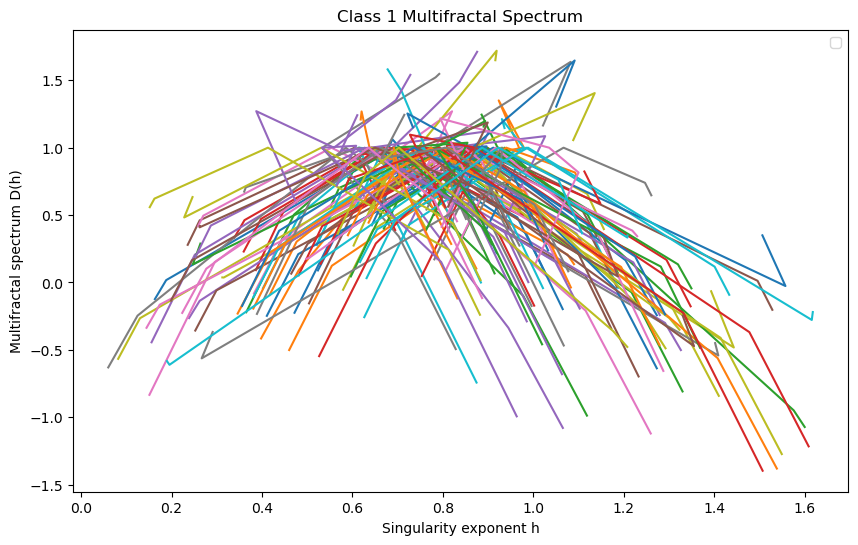

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


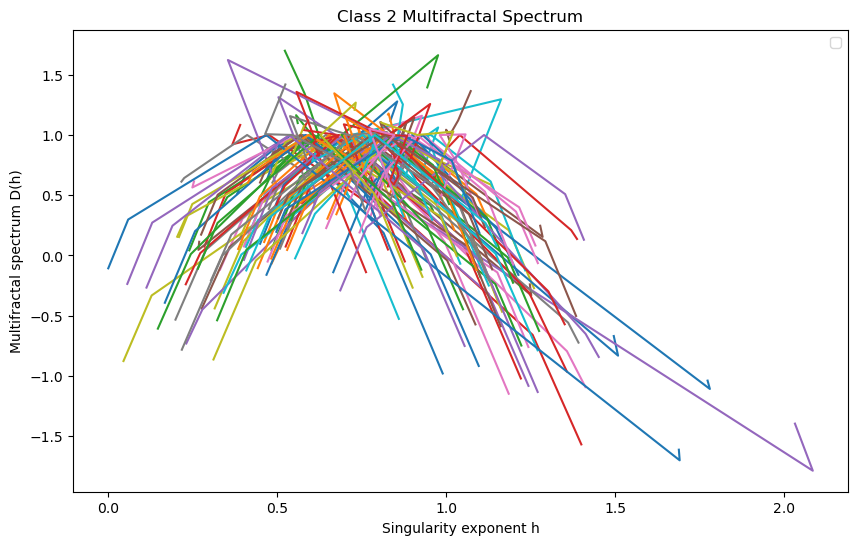

Signal 1 - Class 1: h_min = 0.16325416317654673, h_max = 1.0284213922861305
Signal 1 - Class 2: h_min = 0.38216245378542846, h_max = 0.9899312540990524
--------------------------------------------------
Signal 2 - Class 1: h_min = 0.7943860940872987, h_max = 0.979252283190585
Signal 2 - Class 2: h_min = 0.8027185879131475, h_max = 0.8938149388127781
--------------------------------------------------
Signal 3 - Class 1: h_min = 0.5526559687313379, h_max = 1.3301071865956149
Signal 3 - Class 2: h_min = 0.24073087034332818, h_max = 0.9606536593189925
--------------------------------------------------
Signal 4 - Class 1: h_min = 0.3387308919744947, h_max = 0.7825966817784664
Signal 4 - Class 2: h_min = 0.28547849592246255, h_max = 1.3997760506487502
--------------------------------------------------
Signal 5 - Class 1: h_min = 0.7074511838050102, h_max = 1.1094516062803335
Signal 5 - Class 2: h_min = 0.484707667636199, h_max = 1.2435115452051977
--------------------------------------------

In [12]:

# Step 2: Load the signals
# Assume we have two lists of signals, class1_signals and class2_signals
# Here, we generate some synthetic data for illustration purposes

# Generating synthetic data for two classes
np.random.seed(0)
# class1_signals = [np.cumsum(np.random.randn(1000)) for _ in range(10)]  # Random walk signals
# class2_signals = [np.cumsum(np.random.randn(1000) + 0.5) for _ in range(10)]  # Biased random walk signals

class1_signals = X1
class2_signals = X2
# Function to perform multifractal analysis
def perform_multifractal_analysis(signals):
    results = []
    for signal in signals:
        dwt, lwt = mfa.mf_analysis_full(
        signal,
        scaling_ranges=[(2, 4)],
        q=[-10, -5, 0, 5, 10],
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
    )
        
        sf, cumul, mfs, hmin = lwt
        mf_analysis = mfs
    #         mf_analysis = MFAnalysis(signal, n_cumul=2, q=[-10, -5, 0, 5, 10])
    #         mf_analysis.analyze()
        results.append(mf_analysis)
    return results

# Step 3: Perform multifractal analysis
class1_results = perform_multifractal_analysis(class1_signals)
class2_results = perform_multifractal_analysis(class2_signals)

# Step 4: Compare characteristics
# Extracting and plotting the multifractal spectrum for the first signal in each class as an example

def plot_multifractal_spectrum(results, title):
    plt.figure(figsize=(10, 6))
    for result in results:
        spectrum = result
        plt.plot(spectrum.hq.squeeze(), spectrum.Dq.squeeze())#, label='Signal')
    plt.xlabel('Singularity exponent h')
    plt.ylabel('Multifractal spectrum D(h)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the multifractal spectrum for the first signal in each class
plot_multifractal_spectrum(class1_results, 'Class 1 Multifractal Spectrum')
plot_multifractal_spectrum(class2_results, 'Class 2 Multifractal Spectrum')

# Compare other characteristics like the Hölder exponents, scaling functions, etc.
def compare_characteristics(class1_results, class2_results):
    # Extract and compare characteristics
    for i, (res1, res2) in enumerate(zip(class1_results, class2_results)):
        h_min1, h_max1 = res1.hq.min(), res1.hq.max()
        h_min2, h_max2 = res2.hq.min(), res2.hq.max()
        print(f'Signal {i + 1} - Class 1: h_min = {h_min1}, h_max = {h_max1}')
        print(f'Signal {i + 1} - Class 2: h_min = {h_min2}, h_max = {h_max2}')
        print('-' * 50)

compare_characteristics(class1_results, class2_results)
